## 1.1 Import some great packages


In [575]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from base import ROOT_DIR

## 1.2 Load the data

In [576]:
# set paths of different subdirectories
dir_duvernay = ROOT_DIR / 'gtx/data/Duvernay/Duvernay/'
# 3 Organize Duvernay temperature data

## 2.1 Read in DST BHT input and "true temp" synthetic data

In [577]:
Duvernay_Truth = pd.read_excel(dir_duvernay / 'Duvenay TrueTemp_Train.xlsx')
Duvernay_DST = pd.read_excel(dir_duvernay / 'Duvernay DST BHT for SPE April 20 2021.xlsx')
Duvernay_Truth.head()

,UWI,Depths subsea (m),True Temperature (oC)
0,100010107020W500,-720,2.53
1,100010107020W500,-700,2.54
2,100010107020W500,-680,2.54
3,100010107020W500,-660,3.30
4,100010107020W500,-640,4.06


In [578]:
Duvernay_DST.head()

,Well ID,DST Start Depth (MD) (m),DST End Depth (MD) (m),DST Bottom Hole Temp. (degC),DST Test Date,Test Type,DST Misrun,DST Number,Formation DSTd,Unnamed: 9,elevation M above sea level,UWI
0,100010107020W500,1410.6,1423.4,48.33,26025,DST,N,2,TRmontney,NaN,701.0,100010107020W500
1,100010608109W500,1686.0,1694.0,34.26,33647,DST,N,1,Dmuskeg,NaN,645.6,100010608109W500
2,100010904012W500,3698.0,3718.0,104.40,30798,LRT,N,1,Melkton,NaN,1283.8,100010904012W500
3,100011206021W400,822.0,825.0,29.00,29543,DST,N,4,Dwintrbrn,NaN,651.6,100011206021W400
4,100011506915W500,1801.0,1818.0,64.00,30760,DST,N,4,Dwabamun,NaN,873.1,100011506915W500


In [579]:
# add in an extra column calculating the depth sub sea (elevation-depth)*-1
Duvernay_DST['Depth_SS(m)']=-1*(Duvernay_DST['elevation M above sea level']-(Duvernay_DST['DST Start Depth (MD) (m)']+Duvernay_DST['DST End Depth (MD) (m)'])/2)
Duvernay_DST.head()

,Well ID,DST Start Depth (MD) (m),DST End Depth (MD) (m),DST Bottom Hole Temp. (degC),DST Test Date,Test Type,DST Misrun,DST Number,Formation DSTd,Unnamed: 9,elevation M above sea level,UWI,Depth_SS(m)
0,100010107020W500,1410.6,1423.4,48.33,26025,DST,N,2,TRmontney,NaN,701.0,100010107020W500,716.0
1,100010608109W500,1686.0,1694.0,34.26,33647,DST,N,1,Dmuskeg,NaN,645.6,100010608109W500,1044.4
2,100010904012W500,3698.0,3718.0,104.40,30798,LRT,N,1,Melkton,NaN,1283.8,100010904012W500,2424.2
3,100011206021W400,822.0,825.0,29.00,29543,DST,N,4,Dwintrbrn,NaN,651.6,100011206021W400,171.9
4,100011506915W500,1801.0,1818.0,64.00,30760,DST,N,4,Dwabamun,NaN,873.1,100011506915W500,936.4


In [580]:
# merge
Duvernay_Combined = Duvernay_DST.merge(Duvernay_Truth, on='UWI', how='left')
Duvernay_Combined.head()

,Well ID,DST Start Depth (MD) (m),DST End Depth (MD) (m),DST Bottom Hole Temp. (degC),DST Test Date,Test Type,DST Misrun,DST Number,Formation DSTd,Unnamed: 9,elevation M above sea level,UWI,Depth_SS(m),Depths subsea (m),True Temperature (oC)
0,100010107020W500,1410.6,1423.4,48.33,26025,DST,N,2,TRmontney,NaN,701.0,100010107020W500,716.0,-720.0,2.53
1,100010107020W500,1410.6,1423.4,48.33,26025,DST,N,2,TRmontney,NaN,701.0,100010107020W500,716.0,-700.0,2.54
2,100010107020W500,1410.6,1423.4,48.33,26025,DST,N,2,TRmontney,NaN,701.0,100010107020W500,716.0,-680.0,2.54
3,100010107020W500,1410.6,1423.4,48.33,26025,DST,N,2,TRmontney,NaN,701.0,100010107020W500,716.0,-660.0,3.30
4,100010107020W500,1410.6,1423.4,48.33,26025,DST,N,2,TRmontney,NaN,701.0,100010107020W500,716.0,-640.0,4.06


In [581]:
Duvernay_Combined.columns

Index(['Well ID', 'DST Start Depth (MD) (m)', 'DST End Depth (MD) (m)',
       'DST Bottom Hole Temp. (degC)', 'DST Test Date', 'Test Type',
       'DST Misrun', 'DST Number', 'Formation DSTd', 'Unnamed: 9',
       'elevation M above sea level', 'UWI', 'Depth_SS(m)',
       'Depths subsea (m)', 'True Temperature (oC)'],
      dtype='object')

In [582]:
# keep only the synthetic model temperature data for the relevant depths for which there is BHT measurement
Duvernay_Combined['diff_depth'] = Duvernay_Combined['Depth_SS(m)']-Duvernay_Combined['Depths subsea (m)']
Duvernay_Combined['diff_depth_abs'] = np.abs(Duvernay_Combined['diff_depth'])
idx = Duvernay_Combined.groupby(['UWI'])['diff_depth_abs'].transform(min) == Duvernay_Combined['diff_depth_abs']

TrueTempUWI = Duvernay_Combined.loc[idx, ['UWI', 'diff_depth_abs', 'True Temperature (oC)']]
TrueTempUWI = TrueTempUWI.copy(deep=True)
Duvernay_Combined_cln = Duvernay_DST.merge(TrueTempUWI, on='UWI', how='left')
Duvernay_Combined_cln = Duvernay_Combined_cln.drop_duplicates(['UWI'])
Duvernay_Combined_cln.head()

,Well ID,DST Start Depth (MD) (m),DST End Depth (MD) (m),DST Bottom Hole Temp. (degC),DST Test Date,Test Type,DST Misrun,DST Number,Formation DSTd,Unnamed: 9,elevation M above sea level,UWI,Depth_SS(m),diff_depth_abs,True Temperature (oC)
0,100010107020W500,1410.6,1423.4,48.33,26025,DST,N,2,TRmontney,NaN,701.0,100010107020W500,716.0,4.0,60.97
1,100010608109W500,1686.0,1694.0,34.26,33647,DST,N,1,Dmuskeg,NaN,645.6,100010608109W500,1044.4,4.4,63.98
2,100010904012W500,3698.0,3718.0,104.40,30798,LRT,N,1,Melkton,NaN,1283.8,100010904012W500,2424.2,NaN,NaN
3,100011206021W400,822.0,825.0,29.00,29543,DST,N,4,Dwintrbrn,NaN,651.6,100011206021W400,171.9,8.1,39.07
4,100011506915W500,1801.0,1818.0,64.00,30760,DST,N,4,Dwabamun,NaN,873.1,100011506915W500,936.4,3.6,69.47


## 2.2 Merge in static temperature log data

In [583]:
Static_log_temp = pd.read_csv(ROOT_DIR / 'gtx/data/Data_static_logs.csv')
Duvernay_Combined_cln['UWI'] = Duvernay_Combined_cln['UWI'].astype(str)
Duvernay_Combined_cln = Duvernay_Combined_cln.copy(deep=True)
Duvernay_Combined_cln['TrueTemp_datasource_syn'] = 'synthetic'
Static_log_temp['TrueTemp_datasource_stat'] = 'static_temp_logs'
Duvernay_Combined_stat = Duvernay_Combined_cln.merge(Static_log_temp, left_on='UWI',right_on='Well_ID', how='left')

In [584]:
Static_log_temp.head()

,Well_ID,Depth (ft),Temp (degC),Field,TrueTemp_datasource_stat
0,42013301930000,10700.0,132.778000,Eaglebine,static_temp_logs
1,42041305800000,7360.0,82.777778,Eaglebine,static_temp_logs
2,42041311700000,7828.0,118.888889,Eaglebine,static_temp_logs
3,42041311980000,7954.0,105.000000,Eaglebine,static_temp_logs
4,42051305380000,8380.0,111.111111,Eaglebine,static_temp_logs


In [585]:
# Coalesce columns together with priority for true temperature measurements
Duvernay_Combined_stat['TempC_Fin'] = Duvernay_Combined_stat['Temp (degC)'].fillna(Duvernay_Combined_stat['True Temperature (oC)'])
Duvernay_Combined_stat['TrueTemp_datasource'] = Duvernay_Combined_stat['TrueTemp_datasource_stat'].fillna(Duvernay_Combined_stat['TrueTemp_datasource_syn'])

Duvernay_Combined_stat.head()

,Well ID,DST Start Depth (MD) (m),DST End Depth (MD) (m),DST Bottom Hole Temp. (degC),DST Test Date,Test Type,DST Misrun,DST Number,Formation DSTd,Unnamed: 9,...,diff_depth_abs,True Temperature (oC),TrueTemp_datasource_syn,Well_ID,Depth (ft),Temp (degC),Field,TrueTemp_datasource_stat,TempC_Fin,TrueTemp_datasource
0,100010107020W500,1410.6,1423.4,48.33,26025,DST,N,2,TRmontney,NaN,...,4.0,60.97,synthetic,NaN,NaN,NaN,NaN,NaN,60.97,synthetic
1,100010608109W500,1686.0,1694.0,34.26,33647,DST,N,1,Dmuskeg,NaN,...,4.4,63.98,synthetic,NaN,NaN,NaN,NaN,NaN,63.98,synthetic
2,100010904012W500,3698.0,3718.0,104.40,30798,LRT,N,1,Melkton,NaN,...,NaN,NaN,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,synthetic
3,100011206021W400,822.0,825.0,29.00,29543,DST,N,4,Dwintrbrn,NaN,...,8.1,39.07,synthetic,NaN,NaN,NaN,NaN,NaN,39.07,synthetic
4,100011506915W500,1801.0,1818.0,64.00,30760,DST,N,4,Dwabamun,NaN,...,3.6,69.47,synthetic,NaN,NaN,NaN,NaN,NaN,69.47,synthetic


In [586]:
Duvernay_Combined.columns

Index(['Well ID', 'DST Start Depth (MD) (m)', 'DST End Depth (MD) (m)',
       'DST Bottom Hole Temp. (degC)', 'DST Test Date', 'Test Type',
       'DST Misrun', 'DST Number', 'Formation DSTd', 'Unnamed: 9',
       'elevation M above sea level', 'UWI', 'Depth_SS(m)',
       'Depths subsea (m)', 'True Temperature (oC)', 'diff_depth',
       'diff_depth_abs'],
      dtype='object')

In [587]:
useful_columns = ['Well ID', 'TempC_Fin', 'Depth_SS(m)', 'elevation M above sea level']
duvernay_temp = Duvernay_Combined_stat[useful_columns]
duvernay_temp

,Well ID,TempC_Fin,Depth_SS(m),elevation M above sea level
0,100010107020W500,60.97,716.00,701.0
1,100010608109W500,63.98,1044.40,645.6
2,100010904012W500,NaN,2424.20,1283.8
3,100011206021W400,39.07,171.90,651.6
4,100011506915W500,69.47,936.40,873.1
...,...,...,...,...
507,102101403324W400,NaN,1513.50,896.5
508,102102106218W500,NaN,2176.75,878.7
509,102112204416W500,NaN,2653.90,1175.1
510,102142004709W500,81.48,1341.20,956.3


In [588]:
duvernay_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Well ID                      512 non-null    object 
 1   TempC_Fin                    372 non-null    float64
 2   Depth_SS(m)                  512 non-null    float64
 3   elevation M above sea level  512 non-null    float64
dtypes: float64(3), object(1)
memory usage: 20.0+ KB


# 3. Call Well Headers Data

In [589]:
file = ROOT_DIR / 'gtx/data/Duvernay/Duvernay/Duvernay well headers SPE April 21 2021 .xlsx'
df_well = pd.read_excel(file)
print(df_well.head())

               UWI   Elevation Meters ElevationDatum  TD meters   \
0  100072507623W500             555.7             KB      2545.0   
1  100062007823W500             560.9             KB      2430.0   
2  100052107723W500             558.4             KB      2515.5   
3  100061307518W500             631.4             KB      2411.0   
4  100070907618W500             627.0             KB      2408.0   

   SurfaceLatitude_NAD83  SurfaceLongitude_NAD83  BottomLatitude_NAD83  \
0              55.613640             -117.423800             55.613640   
1              55.770872             -117.537674             55.770872   
2              55.683723             -117.516168             55.683723   
3              55.494600             -116.653606             55.494600   
4              55.566965             -116.726243             55.566965   

   BottomLongitude_NAD83  SurfaceLatitude_NAD27  SurfaceLongitude_NAD27  \
0            -117.423800              55.613640             -117.423800

In [590]:
column_names = df_well.columns
print(column_names)
duvernay_geo = df_well[
    ['UWI ', 'Elevation Meters', 'TD meters ', 'SurfaceLongitude_NAD83',
     'SurfaceLatitude_NAD83',
     ]]
print(duvernay_geo.head())

Index(['UWI ', 'Elevation Meters', 'ElevationDatum', 'TD meters ',
       'SurfaceLatitude_NAD83', 'SurfaceLongitude_NAD83',
       'BottomLatitude_NAD83', 'BottomLongitude_NAD83',
       'SurfaceLatitude_NAD27', 'SurfaceLongitude_NAD27',
       'BottomLatitude_NAD27', 'BottomLongitude_NAD27'],
      dtype='object')
               UWI   Elevation Meters  TD meters   SurfaceLongitude_NAD83  \
0  100072507623W500             555.7      2545.0             -117.423800   
1  100062007823W500             560.9      2430.0             -117.537674   
2  100052107723W500             558.4      2515.5             -117.516168   
3  100061307518W500             631.4      2411.0             -116.653606   
4  100070907618W500             627.0      2408.0             -116.726243   

   SurfaceLatitude_NAD83  
0              55.613640  
1              55.770872  
2              55.683723  
3              55.494600  
4              55.566965  


In [591]:
print(df_well.isna().any())

UWI                       False
Elevation Meters          False
ElevationDatum            False
TD meters                 False
SurfaceLatitude_NAD83     False
SurfaceLongitude_NAD83    False
BottomLatitude_NAD83      False
BottomLongitude_NAD83     False
SurfaceLatitude_NAD27     False
SurfaceLongitude_NAD27    False
BottomLatitude_NAD27      False
BottomLongitude_NAD27     False
dtype: bool


In [592]:
gdf = gpd.GeoDataFrame(
    duvernay_geo, crs='epsg:4269', geometry=gpd.points_from_xy
    (duvernay_geo.SurfaceLongitude_NAD83, duvernay_geo.SurfaceLatitude_NAD83))

print(gdf.head())

               UWI   Elevation Meters  TD meters   SurfaceLongitude_NAD83  \
0  100072507623W500             555.7      2545.0             -117.423800   
1  100062007823W500             560.9      2430.0             -117.537674   
2  100052107723W500             558.4      2515.5             -117.516168   
3  100061307518W500             631.4      2411.0             -116.653606   
4  100070907618W500             627.0      2408.0             -116.726243   

   SurfaceLatitude_NAD83                     geometry  
0              55.613640  POINT (-117.42380 55.61364)  
1              55.770872  POINT (-117.53767 55.77087)  
2              55.683723  POINT (-117.51617 55.68372)  
3              55.494600  POINT (-116.65361 55.49460)  
4              55.566965  POINT (-116.72624 55.56697)  


In [593]:
gdf = gdf.to_crs(epsg=3857)
print(gdf.head())

               UWI   Elevation Meters  TD meters   SurfaceLongitude_NAD83  \
0  100072507623W500             555.7      2545.0             -117.423800   
1  100062007823W500             560.9      2430.0             -117.537674   
2  100052107723W500             558.4      2515.5             -117.516168   
3  100061307518W500             631.4      2411.0             -116.653606   
4  100070907618W500             627.0      2408.0             -116.726243   

   SurfaceLatitude_NAD83                           geometry  
0              55.613640  POINT (-13071557.623 7481883.651)  
1              55.770872  POINT (-13084234.019 7512937.315)  
2              55.683723  POINT (-13081839.982 7495709.772)  
3              55.494600  POINT (-12985820.019 7458455.717)  
4              55.566965  POINT (-12993905.933 7472689.213)  


In [594]:
duvernay_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Well ID                      512 non-null    object 
 1   TempC_Fin                    372 non-null    float64
 2   Depth_SS(m)                  512 non-null    float64
 3   elevation M above sea level  512 non-null    float64
dtypes: float64(3), object(1)
memory usage: 20.0+ KB


In [595]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   UWI                     512 non-null    object  
 1   Elevation Meters        512 non-null    float64 
 2   TD meters               512 non-null    float64 
 3   SurfaceLongitude_NAD83  512 non-null    float64 
 4   SurfaceLatitude_NAD83   512 non-null    float64 
 5   geometry                512 non-null    geometry
dtypes: float64(4), geometry(1), object(1)
memory usage: 24.1+ KB


In [596]:
gdf.columns = list(map(lambda x: x.strip(), gdf.columns))

In [597]:
duvernay_temp.columns

Index(['Well ID', 'TempC_Fin', 'Depth_SS(m)', 'elevation M above sea level'], dtype='object')

In [598]:
temp_merged = gdf.merge(duvernay_temp, left_on='UWI', right_on='Well ID', how='left')

In [599]:
temp_merged.drop('elevation M above sea level', axis=1, inplace=True)

In [600]:
temp_merged.head()

,UWI,Elevation Meters,TD meters,SurfaceLongitude_NAD83,SurfaceLatitude_NAD83,geometry,Well ID,TempC_Fin,Depth_SS(m)
0,100072507623W500,555.7,2545.0,-117.423800,55.613640,POINT (-13071557.623 7481883.651),100072507623W500,82.04,1942.80
1,100062007823W500,560.9,2430.0,-117.537674,55.770872,POINT (-13084234.019 7512937.315),100062007823W500,66.22,1298.10
2,100052107723W500,558.4,2515.5,-117.516168,55.683723,POINT (-13081839.982 7495709.772),100052107723W500,NaN,600.10
3,100061307518W500,631.4,2411.0,-116.653606,55.494600,POINT (-12985820.019 7458455.717),100061307518W500,42.39,235.35
4,100070907618W500,627.0,2408.0,-116.726243,55.566965,POINT (-12993905.933 7472689.213),100070907618W500,46.39,326.00


In [601]:
temp_merged.drop(['SurfaceLongitude_NAD83', 'SurfaceLatitude_NAD83', 'Well ID'], axis=1, inplace=True)

In [602]:
temp_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   UWI               512 non-null    object  
 1   Elevation Meters  512 non-null    float64 
 2   TD meters         512 non-null    float64 
 3   geometry          512 non-null    geometry
 4   TempC_Fin         372 non-null    float64 
 5   Depth_SS(m)       512 non-null    float64 
dtypes: float64(4), geometry(1), object(1)
memory usage: 28.0+ KB


In [603]:
temp_merged.rename(columns={'TD meters':'TD(m)', 'TempC_Fin':'True Temp (oC)', 'Elevation Meters':'Elevation(m)'}, inplace=True)

In [604]:
temp_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   UWI             512 non-null    object  
 1   Elevation(m)    512 non-null    float64 
 2   TD(m)           512 non-null    float64 
 3   geometry        512 non-null    geometry
 4   True Temp (oC)  372 non-null    float64 
 5   Depth_SS(m)     512 non-null    float64 
dtypes: float64(4), geometry(1), object(1)
memory usage: 28.0+ KB


In [605]:
temp_merged.head()

,UWI,Elevation(m),TD(m),geometry,True Temp (oC),Depth_SS(m)
0,100072507623W500,555.7,2545.0,POINT (-13071557.623 7481883.651),82.04,1942.80
1,100062007823W500,560.9,2430.0,POINT (-13084234.019 7512937.315),66.22,1298.10
2,100052107723W500,558.4,2515.5,POINT (-13081839.982 7495709.772),NaN,600.10
3,100061307518W500,631.4,2411.0,POINT (-12985820.019 7458455.717),42.39,235.35
4,100070907618W500,627.0,2408.0,POINT (-12993905.933 7472689.213),46.39,326.00


BHT -> fORMATION data ;
True temp -> no formation data

In [606]:
gpkg_file_name = 'duvernay.gpkg'
gpkp_path = ROOT_DIR / 'gtx/Scripts_gtx' / gpkg_file_name
temp_merged.to_file(gpkp_path, layer='temperature', driver='GPKG')

# 4. Map Temperatures per formation

In [607]:
# Load formation tops data
tops_df = pd.read_excel(dir_duvernay / 'Duvernay formation tops SPE April 20 2021.xlsx')
tops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   UWI                                                       512 non-null    object 
 1   Bottom Hole Location X_m_NAD27_Zone 11N (120 W to 114 W)  512 non-null    float64
 2   Bottom Hole Location Y_m_NAD27_Zone 11N (120 W to 114 W)  512 non-null    float64
 3   Elevation(m above sea level)                              512 non-null    float64
 4   01_Battle (Surbiton)[SSTVD] (m)                           25 non-null     float64
 5   02_Lea_Park (Surbiton)[SSTVD] (m)                         376 non-null    float64
 6   03_1st_White_Speckled_Shale (Surbiton)[SSTVD] (m)         445 non-null    float64
 7   04_2nd_White_Speckled_Shale (Surbiton)[SSTVD] (m)         446 non-null    float64
 8   05_Fish_scales (Surb

In [608]:
tops_df.columns

Index(['UWI', 'Bottom Hole Location X_m_NAD27_Zone 11N (120 W to 114 W)',
       'Bottom Hole Location Y_m_NAD27_Zone 11N (120 W to 114 W)',
       'Elevation(m above sea level)', '01_Battle (Surbiton)[SSTVD] (m)',
       '02_Lea_Park (Surbiton)[SSTVD] (m)',
       '03_1st_White_Speckled_Shale (Surbiton)[SSTVD] (m)',
       '04_2nd_White_Speckled_Shale (Surbiton)[SSTVD] (m)',
       '05_Fish_scales (Surbiton)[SSTVD] (m)',
       '06_Mannville_Top (Surbiton)[SSTVD] (m)',
       '07_Ostracod_Beds (Surbiton)[SSTVD] (m)',
       '08_Jurassic_Top (Surbiton)[SSTVD] (m)',
       '09_Montney_Top (Surbiton)[SSTVD] (m)',
       '10_Permian_Top (Surbiton)[SSTVD] (m)',
       '11_Wabamun (Surbiton)[SSTVD] (m)',
       '12_Winterburn (Surbiton)[SSTVD] (m)',
       '13_Woodbend (Surbiton)[SSTVD] (m)',
       '14_Duvernay_Top (Surbiton)[SSTVD] (m)',
       '15_Beaverhill (Surbiton)[SSTVD] (m)',
       '16_Elk_Point (Surbiton)[SSTVD] (m)',
       '17_Precambrian Basement (Surbiton)[SSTVD] (m)'],
     

In [609]:
top_sstvd_col = "top_sstvd"
formation_col = "formation"

tops_df = tops_df.set_index('UWI').loc[:, '01_Battle (Surbiton)[SSTVD] (m)':]

In [610]:
# Reshape dataframe (columns to rows using melt method)
tops_df = tops_df.reset_index().melt(id_vars=['UWI'], 
                       var_name=formation_col,
                      value_name=top_sstvd_col)

# Get the actual formation name using regular expressions
tops_df[formation_col] = tops_df[formation_col].str.replace('[^a-zA-Z]', ' ').\
str.replace('Surbiton  SSTVD   m', "").str.strip()

<ipython-input-610-01c597050ace>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  tops_df[formation_col] = tops_df[formation_col].str.replace('[^a-zA-Z]', ' ').\


In [611]:
tops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UWI        8704 non-null   object 
 1   formation  8704 non-null   object 
 2   top_sstvd  6484 non-null   float64
dtypes: float64(1), object(2)
memory usage: 204.1+ KB


## 4.1 Replace zero values with nan and eliminate those rows

In [612]:
# Replace zero with null values (nan)
tops_df[top_sstvd_col] = tops_df[top_sstvd_col].replace(0, np.nan)
tops_df.dropna(inplace=True)
print(tops_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484 entries, 5 to 8682
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UWI        6484 non-null   object 
 1   formation  6484 non-null   object 
 2   top_sstvd  6484 non-null   float64
dtypes: float64(1), object(2)
memory usage: 202.6+ KB
None


In [613]:
# Formation Names
formations = tops_df.formation.unique()
print(formations)

['Battle' 'Lea Park' 'st White Speckled Shale' 'nd White Speckled Shale'
 'Fish scales' 'Mannville Top' 'Ostracod Beds' 'Jurassic Top'
 'Montney Top' 'Permian Top' 'Wabamun' 'Winterburn' 'Woodbend'
 'Duvernay Top' 'Beaverhill' 'Elk Point' 'Precambrian Basement']


## 4.2 Merge tops data with well header data

In [614]:
tops_df = tops_df.merge(gdf[['UWI', 'Elevation Meters']], on='UWI')

In [615]:
tops_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484 entries, 0 to 6483
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UWI               6484 non-null   object 
 1   formation         6484 non-null   object 
 2   top_sstvd         6484 non-null   float64
 3   Elevation Meters  6484 non-null   float64
dtypes: float64(2), object(2)
memory usage: 253.3+ KB


In [616]:
top_md_col = 'top_md'

depth = np.empty([1,0])
for value in tops_df['top_sstvd']:
    if value < 0:
        value = value * -1
        depth = np.append(depth, value)
    else:
        value = value
        depth = np.append(depth, value)
tops_df['top_sstvd_2'] = depth

In [617]:
tops_df[top_md_col] = tops_df['top_sstvd_2'] + tops_df['Elevation Meters']
tops_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484 entries, 0 to 6483
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UWI               6484 non-null   object 
 1   formation         6484 non-null   object 
 2   top_sstvd         6484 non-null   float64
 3   Elevation Meters  6484 non-null   float64
 4   top_sstvd_2       6484 non-null   float64
 5   top_md            6484 non-null   float64
dtypes: float64(4), object(2)
memory usage: 354.6+ KB


In [618]:
tops_df

,UWI,formation,top_sstvd,Elevation Meters,top_sstvd_2,top_md
0,100011804403W500,Battle,618.60,946.90000,618.60,1565.50000
1,100011804403W500,Lea Park,-247.10,946.90000,247.10,1194.00000
2,100011804403W500,st White Speckled Shale,-374.60,946.90000,374.60,1321.50000
3,100011804403W500,nd White Speckled Shale,-644.60,946.90000,644.60,1591.50000
4,100011804403W500,Fish scales,-786.21,946.90000,786.21,1733.11000
...,...,...,...,...,...,...
6479,100013603712W500,Winterburn,882.80,1309.46376,882.80,2192.26376
6480,100013603712W500,Woodbend,760.30,1309.46376,760.30,2069.76376
6481,100013603712W500,Duvernay Top,590.70,1309.46376,590.70,1900.16376
6482,100013603712W500,Beaverhill,562.50,1309.46376,562.50,1871.96376


In [619]:
tops_df.columns

Index(['UWI', 'formation', 'top_sstvd', 'Elevation Meters', 'top_sstvd_2',
       'top_md'],
      dtype='object')

# 5. Process True Temp with Formation tops

## 5.1. Load and Merge True Temp data with Tops Formation data

In [620]:
duvernay_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Well ID                      512 non-null    object 
 1   TempC_Fin                    372 non-null    float64
 2   Depth_SS(m)                  512 non-null    float64
 3   elevation M above sea level  512 non-null    float64
dtypes: float64(3), object(1)
memory usage: 20.0+ KB


In [621]:
#Get MD values by merging with well header data
md_col = "MD"

duv_true_temp = duvernay_temp.merge(gdf[['UWI', 'TD meters']], 
                                  right_on='UWI', left_on='Well ID', how='left')

In [622]:
duv_true_temp.drop('UWI', axis=1, inplace=True)

In [623]:
duv_true_temp.rename(columns={'Well ID': 'UWI', 'TempC_Fin': 'True Temp(oC)', 
                             'elevation M above sea level': 'Elevation(m)'}, inplace=True)

In [624]:
duv_true_temp.shape

(512, 5)

In [625]:
duv_true_temp[md_col] = duv_true_temp['Depth_SS(m)'] + \
duv_true_temp['Elevation(m)']

In [626]:
duv_true_temp.head()

,UWI,True Temp(oC),Depth_SS(m),Elevation(m),TD meters,MD
0,100010107020W500,60.97,716.0,701.0,2767.6748,1417.0
1,100010608109W500,63.98,1044.4,645.6,1745.0000,1690.0
2,100010904012W500,NaN,2424.2,1283.8,4817.0000,3708.0
3,100011206021W400,39.07,171.9,651.6,1492.6000,823.5
4,100011506915W500,69.47,936.4,873.1,2710.0000,1809.5


In [627]:
duv_true_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UWI            512 non-null    object 
 1   True Temp(oC)  372 non-null    float64
 2   Depth_SS(m)    512 non-null    float64
 3   Elevation(m)   512 non-null    float64
 4   TD meters      512 non-null    float64
 5   MD             512 non-null    float64
dtypes: float64(5), object(1)
memory usage: 28.0+ KB


In [628]:
tops_df.shape

(6484, 6)

In [629]:
tops_df.head()

,UWI,formation,top_sstvd,Elevation Meters,top_sstvd_2,top_md
0,100011804403W500,Battle,618.60,946.9,618.60,1565.50
1,100011804403W500,Lea Park,-247.10,946.9,247.10,1194.00
2,100011804403W500,st White Speckled Shale,-374.60,946.9,374.60,1321.50
3,100011804403W500,nd White Speckled Shale,-644.60,946.9,644.60,1591.50
4,100011804403W500,Fish scales,-786.21,946.9,786.21,1733.11


In [630]:
duv_true_temp.head()

,UWI,True Temp(oC),Depth_SS(m),Elevation(m),TD meters,MD
0,100010107020W500,60.97,716.0,701.0,2767.6748,1417.0
1,100010608109W500,63.98,1044.4,645.6,1745.0000,1690.0
2,100010904012W500,NaN,2424.2,1283.8,4817.0000,3708.0
3,100011206021W400,39.07,171.9,651.6,1492.6000,823.5
4,100011506915W500,69.47,936.4,873.1,2710.0000,1809.5


## 5.2 Assign formation names to dephts

In [631]:
gr_tops = tops_df.groupby('UWI')
df_tt = pd.DataFrame()
for name, group in gr_tops:
    well_cond = duv_true_temp['UWI'] == name
    for row in group.itertuples(index=False):
        md_top = getattr(row, top_md_col)
        formation_name = getattr(row, formation_col)
        formation_cond = duv_true_temp[md_col] >= md_top
        if sum(formation_cond) >= 1:
            duv_true_temp.loc[formation_cond & well_cond, formation_col] = formation_name

duv_true_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UWI            512 non-null    object 
 1   True Temp(oC)  372 non-null    float64
 2   Depth_SS(m)    512 non-null    float64
 3   Elevation(m)   512 non-null    float64
 4   TD meters      512 non-null    float64
 5   MD             512 non-null    float64
 6   formation      487 non-null    object 
dtypes: float64(5), object(2)
memory usage: 32.0+ KB


In [632]:
duv_true_temp.head()

,UWI,True Temp(oC),Depth_SS(m),Elevation(m),TD meters,MD,formation
0,100010107020W500,60.97,716.0,701.0,2767.6748,1417.0,Montney Top
1,100010608109W500,63.98,1044.4,645.6,1745.0000,1690.0,Elk Point
2,100010904012W500,NaN,2424.2,1283.8,4817.0000,3708.0,Jurassic Top
3,100011206021W400,39.07,171.9,651.6,1492.6000,823.5,Winterburn
4,100011506915W500,69.47,936.4,873.1,2710.0000,1809.5,Wabamun


In [633]:
duv_true_temp[formation_col].unique()

array(['Montney Top', 'Elk Point', 'Jurassic Top', 'Winterburn',
       'Wabamun', 'Mannville Top', 'Beaverhill',
       'nd White Speckled Shale', 'Ostracod Beds', 'Permian Top', nan,
       'Fish scales', 'st White Speckled Shale', 'Precambrian Basement',
       'Battle', 'Lea Park', 'Duvernay Top', 'Woodbend'], dtype=object)

## 5.3 Aggregate depth and temperature per formation and well

In [634]:
depth_sstvd_col = "Depth_SS(m)"
true_temp_col = "True Temp(oC)"

df_form_temp = (duv_true_temp.groupby(['UWI', formation_col])\
               [[depth_sstvd_col, true_temp_col]].mean())

In [635]:
# reset index from groupby
df_form_temp.reset_index(inplace=True)
df_form_temp.head()

,UWI,formation,Depth_SS(m),True Temp(oC)
0,100010107020W500,Montney Top,716.0,60.97
1,100010608109W500,Elk Point,1044.4,63.98
2,100010904012W500,Jurassic Top,2424.2,NaN
3,100011206021W400,Winterburn,171.9,39.07
4,100011506915W500,Wabamun,936.4,69.47


In [636]:
df_form_temp.shape

(487, 4)

## 5.4 Merge with well headers data

In [637]:
# Create a Geodataframe
duv_form_temp = gpd.GeoDataFrame(df_form_temp
                                 .merge(gdf[['UWI', 'geometry']],
                                       on='UWI', how='left'))

duv_form_temp.head()

,UWI,formation,Depth_SS(m),True Temp(oC),geometry
0,100010107020W500,Montney Top,716.0,60.97,POINT (-13013643.992 7367298.549)
1,100010608109W500,Elk Point,1044.4,63.98,POINT (-12845217.714 7555929.851)
2,100010904012W500,Jurassic Top,2424.2,NaN,POINT (-12874926.548 6877189.045)
3,100011206021W400,Winterburn,171.9,39.07,POINT (-12579400.128 7201926.284)
4,100011506915W500,Wabamun,936.4,69.47,POINT (-12934006.585 7355859.144)


In [638]:
duv_form_temp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 487 entries, 0 to 486
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   UWI            487 non-null    object  
 1   formation      487 non-null    object  
 2   Depth_SS(m)    487 non-null    float64 
 3   True Temp(oC)  357 non-null    float64 
 4   geometry       487 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 22.8+ KB


## 5.4 Save to Geopackage

In [639]:
duv_form_temp.to_file(gpkp_path, layer='tops_temperature', 
                    driver='GPKG')

# 6. Data Distribution of Temperature and Tops of Duvernay Basin

# 6.1 Tops Formations Distriburion

In [640]:
formations = tops_df[formation_col].unique()
len(formations)

17

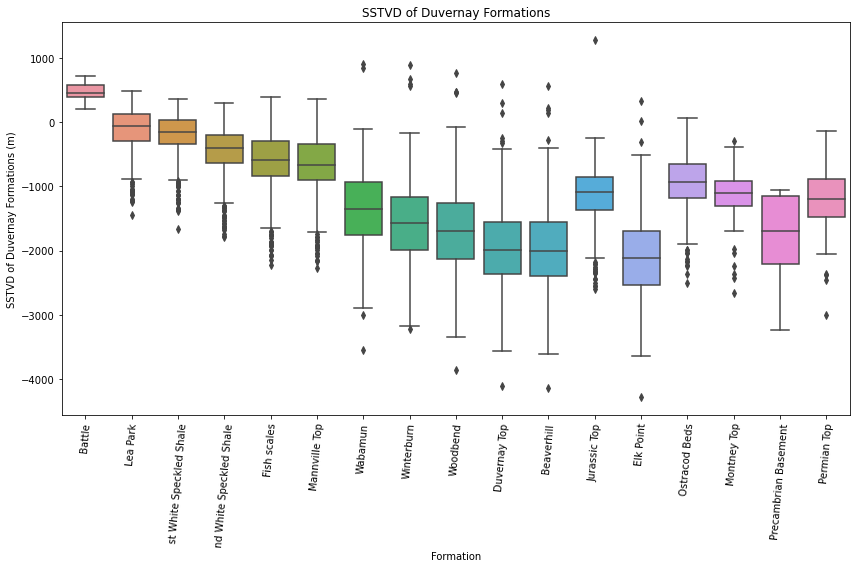

In [641]:
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(data=tops_df, x=formation_col, y='top_sstvd', ax=ax1,
           order=formations)
ax1.set_xlabel("Formation")
ax1.set_ylabel("SSTVD of Duvernay Formations (m)")
ax1.set_title("SSTVD of Duvernay Formations")
#ax1.invert_yaxis()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=85)
plt.tight_layout()
plt.show()

## 6.2 True Temperatures Distribution

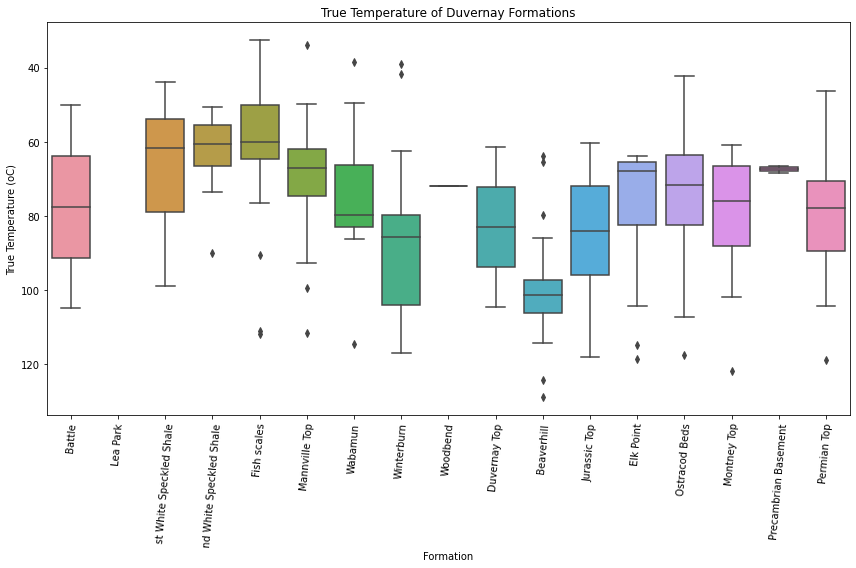

In [642]:
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(data=duv_form_temp, x=formation_col, y=true_temp_col,
            ax=ax2, order=formations)
ax2.set_xlabel("Formation")
ax2.set_ylabel("True Temperature (oC)")
ax2.set_title("True Temperature of Duvernay Formations")
ax2.invert_yaxis()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=85)
plt.tight_layout()
plt.show()

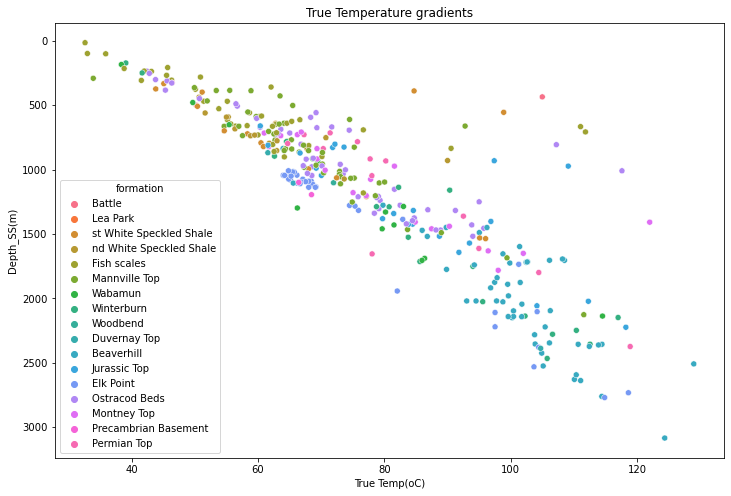

In [643]:
fig_3, ax_3 = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(x=true_temp_col, y=depth_sstvd_col,
                hue=formation_col, data=duv_form_temp, hue_order=formations, ax=ax_3)
plt.title("True Temperature gradients")
plt.gca().invert_yaxis()
plt.show()